In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [6]:
training_set = pd.read_csv('Facebook_Ads_2.csv',encoding='ISO-8859-1')
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [7]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [9]:
click = training_set[training_set['Clicked']==1]
no_click = training_set[training_set['Clicked']==0]

In [15]:
print(f"Total customer : ",len(training_set))
print(f"Number of customer clicked Ad : {len(click)}")
print(f"Number of customer not clicked Ad : {len(no_click)}")

Total customer :  499
Number of customer clicked Ad : 250
Number of customer not clicked Ad : 249


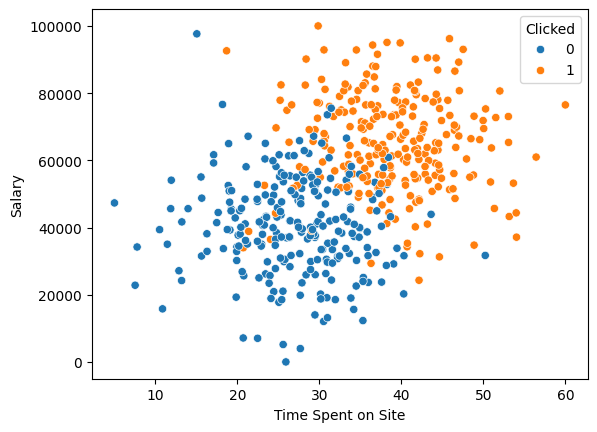

In [21]:

sns.scatterplot(
    x='Time Spent on Site',
    y='Salary',
    hue='Clicked',
    data=training_set
)
plt.show()

<Axes: xlabel='Clicked', ylabel='Salary'>

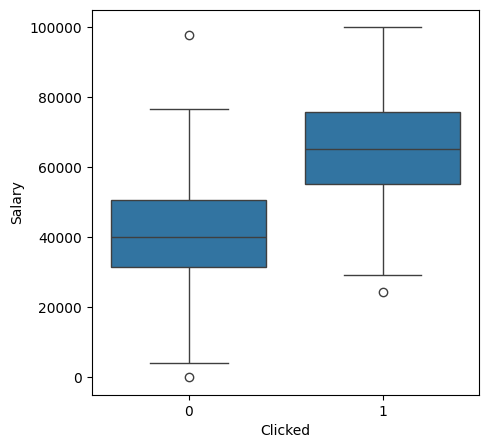

In [24]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Salary', data=training_set)

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

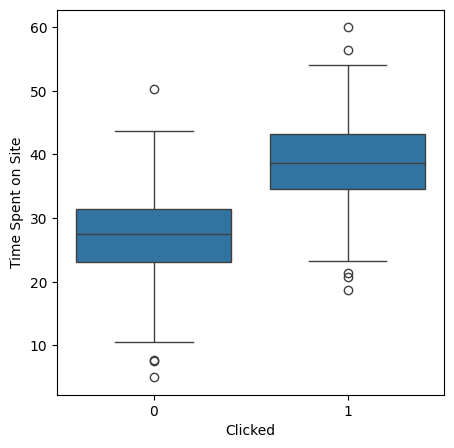

In [26]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Time Spent on Site', data=training_set)

In [30]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [31]:
training_set.drop(['Names','emails','Country'], axis=1, inplace=True)

In [32]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time Spent on Site  499 non-null    float64
 1   Salary              499 non-null    float64
 2   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [38]:
X = training_set.drop('Clicked', axis=1).values
y = training_set['Clicked'].values

In [39]:
X.shape, y.shape

((499, 2), (499,))

In [41]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 2), (175, 2), (324,), (175,))

In [45]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = classifier.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)

Confusion Matrix: [[81  7]
 [ 5 82]]


<Axes: >

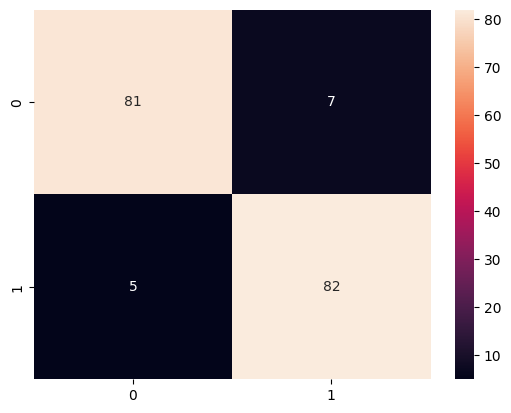

In [50]:
sns.heatmap(cm, annot=True, fmt='d')

In [51]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        88
           1       0.92      0.94      0.93        87

    accuracy                           0.93       175
   macro avg       0.93      0.93      0.93       175
weighted avg       0.93      0.93      0.93       175

Accuracy Score: 0.9314285714285714


### Training data visualization

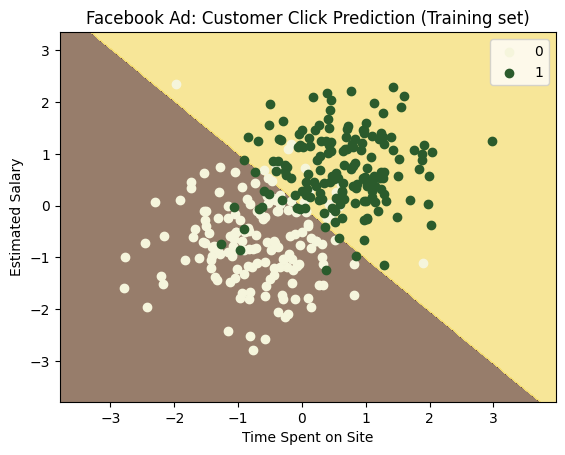

In [66]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#755139FF', '#F5DE76')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('BEIGE', '#2B5B2C'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test data visualization

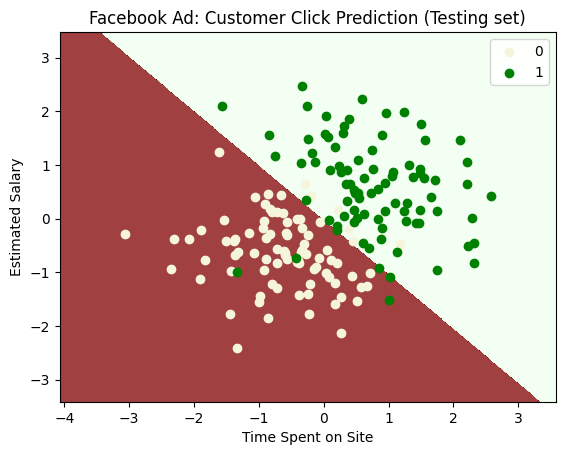

In [72]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('maroon', 'honeydew')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Beige', 'Green'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()